<a href="https://colab.research.google.com/github/RomaTruba/KursavayaScoring/blob/main/Kursovaya_gotovaya_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Импорт библиотек


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, VotingClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.utils.class_weight import compute_class_weight
import plotly.express as px



Исследование данных

In [ ]:
# Загрузка данных
data = pd.read_csv("/content/bank.csv")
print("Данные загружены:")
print(data.head())

Данные загружены:
   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  


In [ ]:
data = data.drop_duplicates()

In [ ]:
data.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [ ]:
data.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
balance,int64
housing,object
loan,object
contact,object
day,int64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


<Axes: >

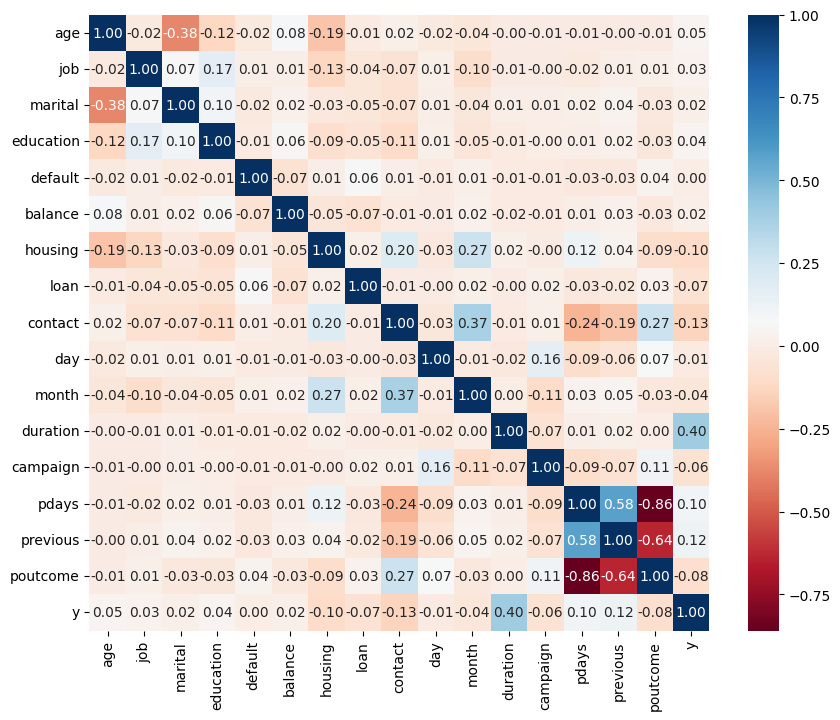

In [ ]:
corr = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap = 'RdBu',fmt = ".2f")

Преобразуем значения в текущем категориальном столбце в числовые значения.

In [ ]:
# Преобразование категориальных данных
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
for column in categorical_columns:
  if column in data.columns:
    data[column] = LabelEncoder().fit_transform(data[column])

Обучаем LabelEncoder на уникальные значения в столбце 'y', а затем преобразуем все значения в этом столбце в числовые, заменяя исходный столбец новым, числовым.

In [ ]:
# Кодирование целевой переменной
le_target = LabelEncoder()
data['y'] = le_target.fit_transform(data['y'])

 Создаем одномерный массив где y представляет из себя вектор целевой переменной



In [ ]:
# Разделение на признаки и целевую переменную
X = data.drop(columns=['y'])
y = data['y']

разделяем набор данных на обучающую и тестовую выборку

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Создаем модели и графики важности признаков

In [ ]:

models = {
    "Random Forest": RandomForestClassifier(random_state=42, class_weight=class_weights),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', class_weight=class_weights)
}




Обучение модели: Random Forest...
Точность модели Random Forest: 0.8950
              precision    recall  f1-score   support

           0       0.91      0.99      0.94       807
           1       0.56      0.15      0.24        98

    accuracy                           0.90       905
   macro avg       0.73      0.57      0.59       905
weighted avg       0.87      0.90      0.87       905



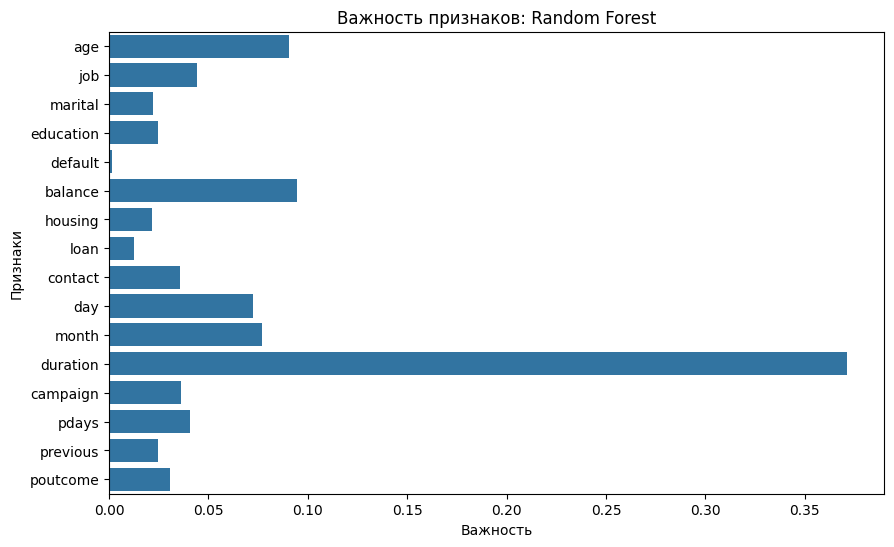

Обучение модели: Gradient Boosting...
Точность модели Gradient Boosting: 0.8917
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       807
           1       0.50      0.28      0.36        98

    accuracy                           0.89       905
   macro avg       0.71      0.62      0.65       905
weighted avg       0.87      0.89      0.88       905



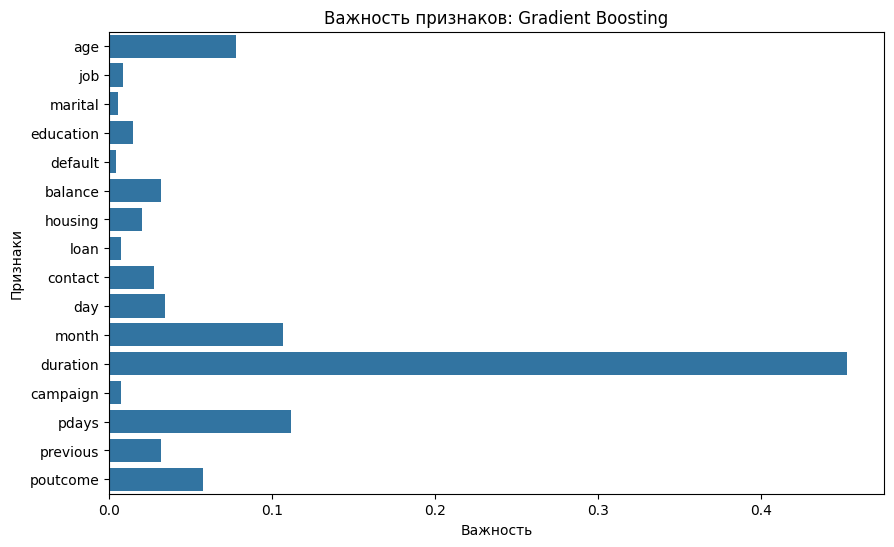

Обучение модели: XGBoost...
Точность модели XGBoost: 0.8939
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       807
           1       0.51      0.40      0.45        98

    accuracy                           0.89       905
   macro avg       0.72      0.68      0.69       905
weighted avg       0.88      0.89      0.89       905



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:26:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


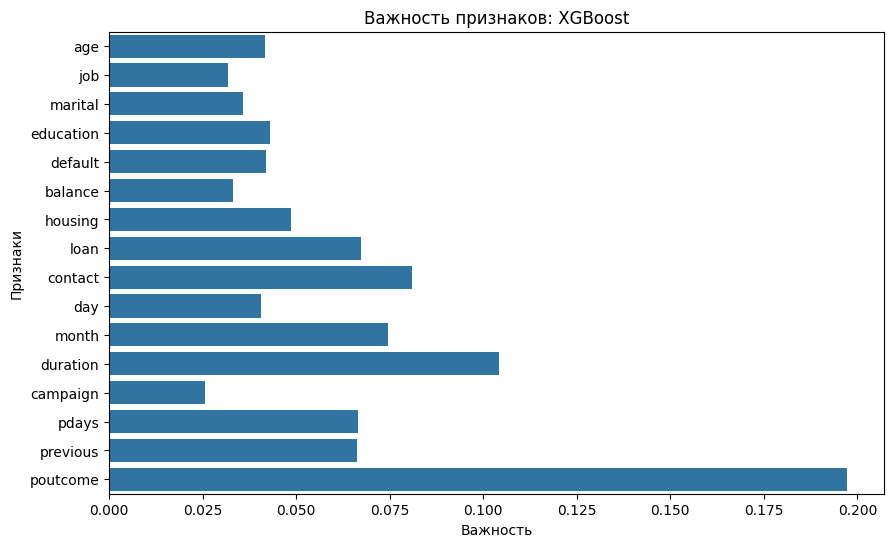

In [ ]:

results = {}

for model_name, model in models.items():
    print(f"Обучение модели: {model_name}...")

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    print(f"Точность модели {model_name}: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    if hasattr(model, "feature_importances_"):
      feature_importances = model.feature_importances_
      plt.figure(figsize=(10, 6))
      sns.barplot(x=feature_importances, y=X.columns)
      plt.title(f"Важность признаков: {model_name}")
      plt.xlabel("Важность")
      plt.ylabel("Признаки")
      plt.show()

Создаем ансамблевую модель

In [ ]:
# Создание ансамблевой модели с Bagging
rf_model = RandomForestClassifier(random_state=42, class_weight=class_weights)
bagging_model = BaggingClassifier(
    estimator=rf_model,
    n_estimators=20,
    random_state=42
)

# Обучение ансамблевой модели
bagging_model.fit(X_train, y_train)
# Оценка модели Bagging
y_pred_bagging = bagging_model.predict(X_test)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print("Bagging Accuracy:", accuracy_bagging)
print("Classification Report (Bagging):")
print(classification_report(y_test, y_pred_bagging))
# Оценка ROC-AUC для Bagging, если доступно predict_proba
if hasattr(bagging_model, "predict_proba"):
    y_proba_bagging = bagging_model.predict_proba(X_test)[:, 1]
    roc_auc_bagging = roc_auc_score(y_test, y_proba_bagging)
    print("Bagging ROC-AUC Score:", roc_auc_bagging)

Bagging Accuracy: 0.8961325966850828
Classification Report (Bagging):
              precision    recall  f1-score   support

           0       0.91      0.99      0.94       807
           1       0.58      0.15      0.24        98

    accuracy                           0.90       905
   macro avg       0.74      0.57      0.59       905
weighted avg       0.87      0.90      0.87       905

Bagging ROC-AUC Score: 0.9118933818880711


Создаем объедененную модель

In [ ]:
# Создание объединенной модели (VotingClassifier)
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', class_weight=class_weights)
voting_model = VotingClassifier(
    estimators=[('RandomForest', rf_model), ('XGBoost', xgb_model)],
    voting='soft'
        )
# Обучение объединенной модели
voting_model.fit(X_train, y_train)
# Оценка объединенной модели (VotingClassifier)
y_pred_voting = voting_model.predict(X_test)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print("Voting Accuracy:", accuracy_voting)
print("Classification Report (Voting):")
print(classification_report(y_test, y_pred_voting))
# Оценка ROC-AUC для VotingClassifier, если доступно predict_proba
if hasattr(voting_model, "predict_proba"):
    y_proba_voting = voting_model.predict_proba(X_test)[:, 1]
    roc_auc_voting = roc_auc_score(y_test, y_proba_voting)
    print("Voting ROC-AUC Score:", roc_auc_voting)


Voting Accuracy: 0.8939226519337017
Classification Report (Voting):
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       807
           1       0.52      0.32      0.39        98

    accuracy                           0.89       905
   macro avg       0.72      0.64      0.67       905
weighted avg       0.88      0.89      0.88       905

Voting ROC-AUC Score: 0.9162810105454822


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:10:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
results['Bagging'] = accuracy_bagging
results['Voting'] = accuracy_voting

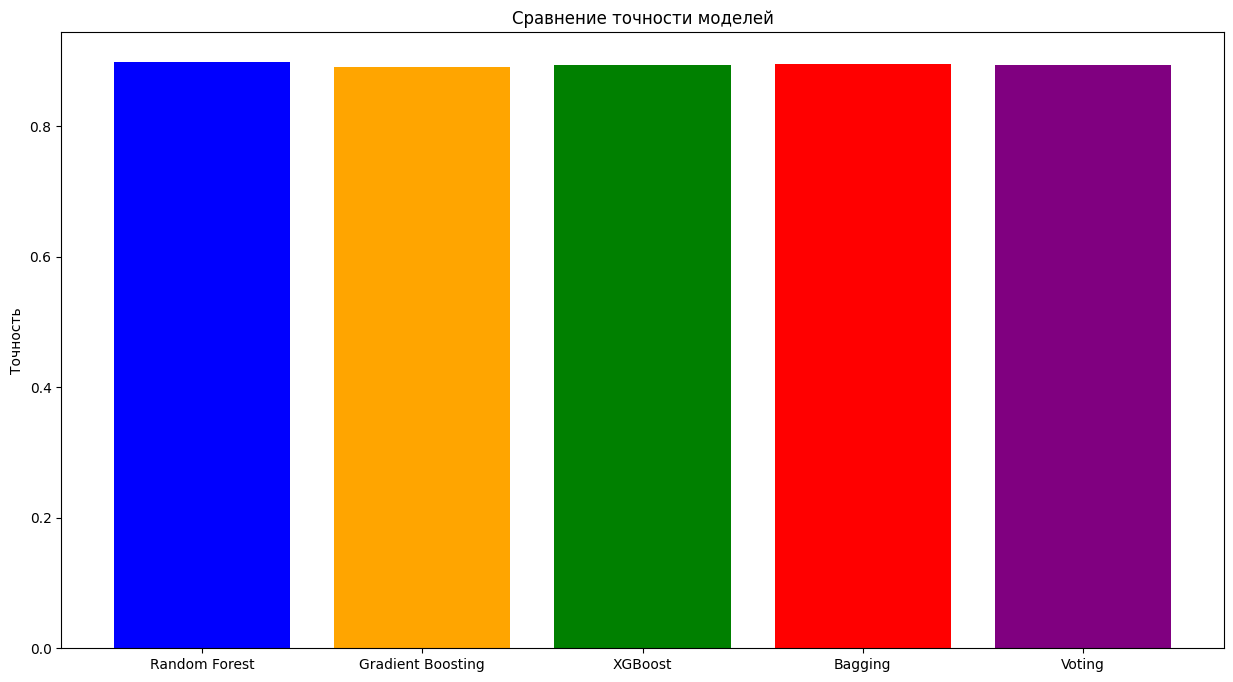

In [ ]:
# График сравнения точности моделей
plt.figure(figsize=(15, 8))
plt.bar(results.keys(), results.values(), color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title("Сравнение точности моделей")
plt.ylabel("Точность")
plt.show()

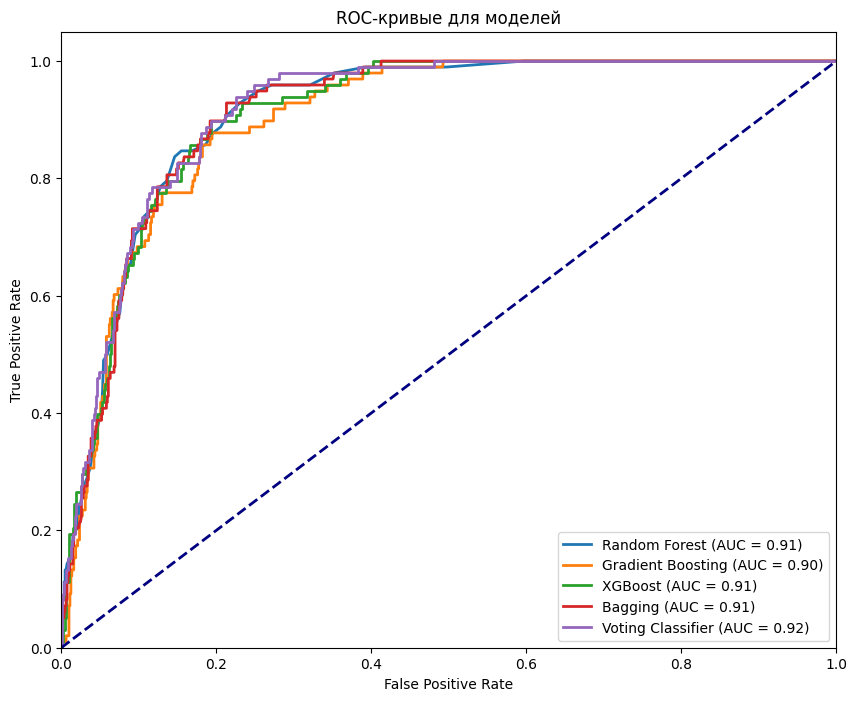

In [ ]:
plt.figure(figsize=(10, 8))

# Вычисление и отрисовка ROC для всех моделей (из словаря `models`)
for model_name, model in models.items():
     if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')


# Вычисление и отрисовка ROC для Bagging
if hasattr(bagging_model, "predict_proba"):
    y_proba_bagging = bagging_model.predict_proba(X_test)[:, 1]
    fpr_bagging, tpr_bagging, _ = roc_curve(y_test, y_proba_bagging)
    roc_auc_bagging = auc(fpr_bagging, tpr_bagging)
    plt.plot(fpr_bagging, tpr_bagging, lw=2, label=f'Bagging (AUC = {roc_auc_bagging:.2f})')

# Вычисление и отрисовка ROC для VotingClassifier
if hasattr(voting_model, "predict_proba"):
    y_proba_voting = voting_model.predict_proba(X_test)[:, 1]
    fpr_voting, tpr_voting, _ = roc_curve(y_test, y_proba_voting)
    roc_auc_voting = auc(fpr_voting, tpr_voting)
    plt.plot(fpr_voting, tpr_voting, lw=2, label=f'Voting Classifier (AUC = {roc_auc_voting:.2f})')


plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривые для моделей')
plt.legend(loc="lower right")
plt.show()

